In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('covid-19(india).csv')


In [3]:
graph=df.groupby(['Date'])['Infected'].agg(np.sum).reset_index()
graph

,Date,Infected
0,02-03-2020,2
1,03-02-2020,3
2,03-03-2020,2
3,04-03-2020,20
4,05-03-2020,1
5,06-03-2020,2
6,07-03-2020,3
7,08-03-2020,5
8,09-03-2020,7
9,10-03-2020,11


In [4]:
graph['yaxis']=graph['Infected'].cumsum()
graph

,Date,Infected,yaxis
0,02-03-2020,2,2
1,03-02-2020,3,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
5,06-03-2020,2,30
6,07-03-2020,3,33
7,08-03-2020,5,38
8,09-03-2020,7,45
9,10-03-2020,11,56


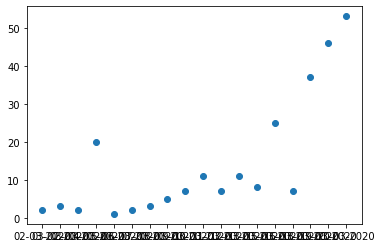

In [5]:
plt.scatter(graph['Date'], graph['Infected'])

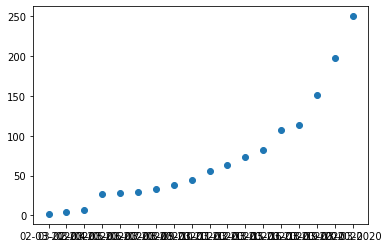

In [6]:
plt.scatter(graph['Date'], graph['yaxis'])